<a href="https://colab.research.google.com/github/miluseel/MiluseelAI/blob/main/Chap4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4-2. 확률적 경사 하강법
## 점진적인 학습

* 당면한 문제
  - 훈련데이터가 한번에 준비되는 것이 아니라 조금씩 전달된다
  - 데이터가 쌓일 때 까지 못 기다림<br>
  -> 기존 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련해야함<br>
    - 시간이 지날수록 데이터가 늘어나게 됨
    - 모델 훈련을 위해 서버를 늘려야 함<br>

    -> 새로운 데이터를 추가할 때 이전 데이터 중 일부를 버리는 식으로 훈련 데이터 크기를 일정하게 유지
      - 데이터를 버릴 때 다른 데이터에 없는 중요한 데이터가 포함되어 있다면? 안되 !!

  => 앞서 훈련한 모델은 버리지 않고 새로운 데이터만 훈련할래유~<br>
    : 점진적 학습 / 온라인 학습
     - 확률적 경사 하강법!!


###확률적 경사 하강법
- 확률적 : 무작위로, 랜덤하게
- 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요 : 경사하강법 모델 훈련
- 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에 랜덤하게 골라 가장 가파른 길을 찾는 방법 : 확률적 경사 하강법
  - 훈련세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 경사 조금씩 내려감 <br>
  -> 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사 내려가면서 전체 샘플 다 사용할 때 까지 계속<br>
  -> 다 내려오지 못하면 다시 시작 : 훈련 세트에 모든 샘플 다시 채워 넣음<br>
  -> 만족할 때 까지 계속 반복<br>
  - 에포크 (epoch) : 확률적 경사 하강법에서 훈련세트를 한 번 모두 사용하는 과정
  - 미니배치 경사 하강법 : 여러 개의 샘플을 사용해 경사하강법을 수행하는 방식
  - 배치 경사 하강법 : 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플 사용 ( 가장 안정적인 방법일 수 있으나 그만큼 자원을 많이 사용 )


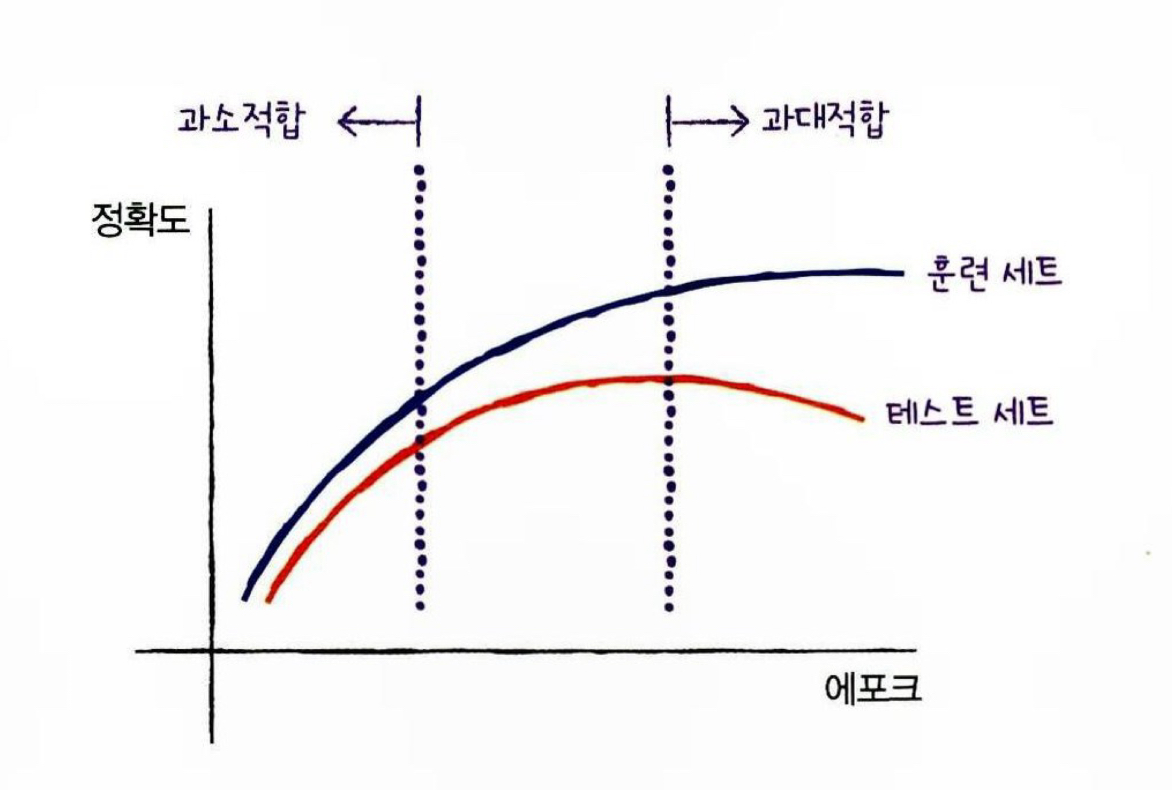

###손실함수 (loss function )
 : 모델이 얼마나 틀렸는지를 숫자로 나타내는 함수 ( 예측값과 실제값이 차이를 측정하는 기준 )
 * 손실함수 값이 작을 수록 좋음
 * 확률적 경사하강법 통해 조금씩 이동하며 찾음
 * 손실함수 vs 비용함수(cost function) <br>
   : 샘플 하나에 대한 손실정의 vs 훈련 세트에 있는 모든 샘플에 대한 손실함수의 합
   

###정확도를 손실함수로 사용했을 때의 단점<br>
: 정확도의 간격이 듬성듬성할 경우 경사하강법을 사용해여 조금씩 이동 불가능 -> 연속적이어야 함 ( 미분 )<br>
=> 연속적 손실함수를 만들기 위한 방법 : 로지스틱 손실함수

###로지스틱 손실함수/ 이진 크로스엔트로피 손실함수<br>
: 이진분류에서 사용하는 손실함수
  - 타깃 = 1일 때 => -log(예측확률)
  : 확률이 1과 멀어져 0에 가까워질수록 손실은 아주 큰 양수
  - 타겟 = 0일 때 => -log(1-예측확률)
  : 예측확률이 0에서 멀어져 1에 가까워질수록 손실은 아주 큰 양수
- 크로스엔트로피 손실함수 : 다중분류에서 사용하는 손실함수

In [ ]:
#확률적 경사하강을 이용한 분류모델
#SGDClassifier

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
#Species: 타겟데이터 / 나머지 5개 : 입력데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

In [ ]:
#사이킷런 train_test_split()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
#특성 표준화 전처리
#훈련세트에서 학습한 통계값 -> 테스트세트 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
#loss 손실함수의 종류 지정 : loss='log_loss'
#max_iter :수행할 에포크 횟수지정
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#출력된 세트들의 정확도가 낮음
#ConvergenceWarning경고 : 모델이 충분히 수렴하지 않음 ->max_iter 값 늘려주는 것이 좋음

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
#모델을 이어서 훈련할 때는 partial_fit() : 1에포크씩 이어서 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#낮지만 정확도 향상됨

0.7983193277310925
0.775


###에포크의 과대/과소적합
* 에포크 횟수가 너무 적으면 : 과소적합
* 훈련세트 점수는 에포크가 진행될수록 꾸준히 증가 / 테스트 세트 점수는 어느순간부터 감소
: 과대적합시작점
* 과대적합이 시작하기 전에 훈련을 멈추는 것 : 조기종료
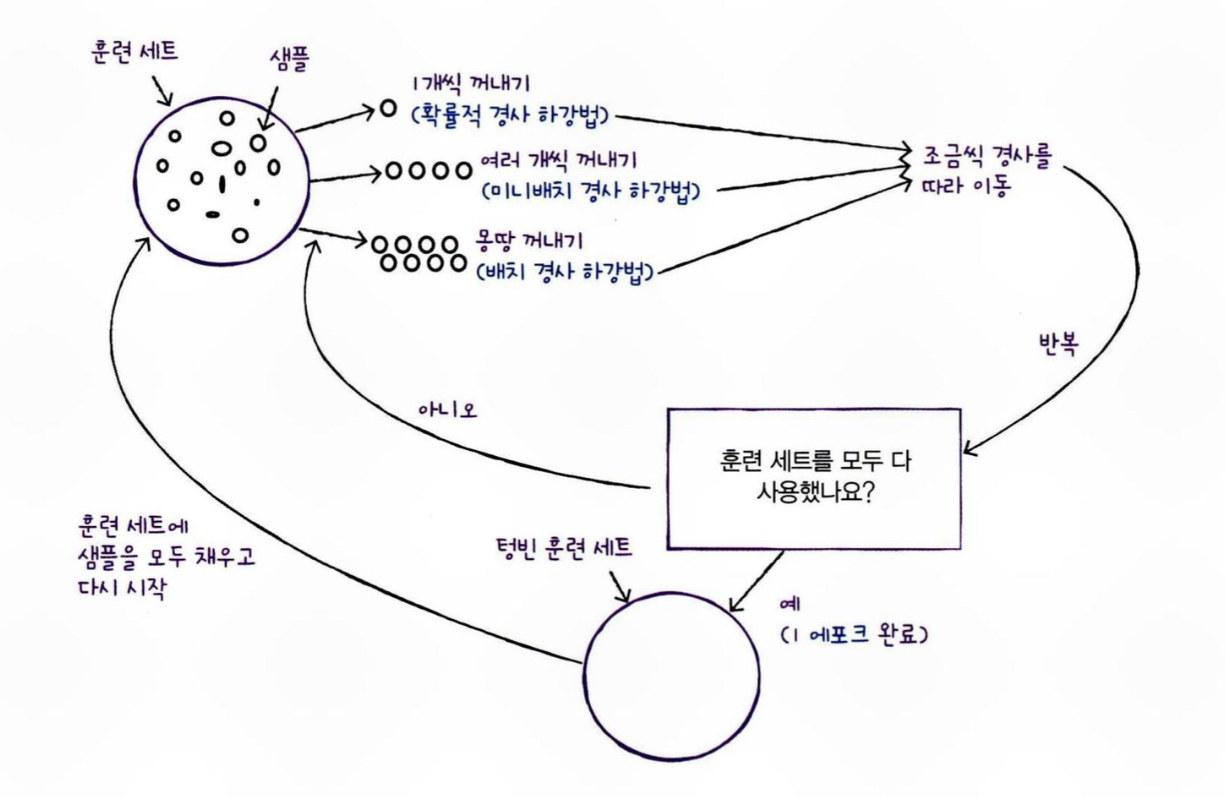



In [ ]:
#np.unique()로 train_target의 7개의 생선 목록 생성
#에포크 마다의 점수기록 2개의 리스트 준비
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
#300번 에포크 훈련반복
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

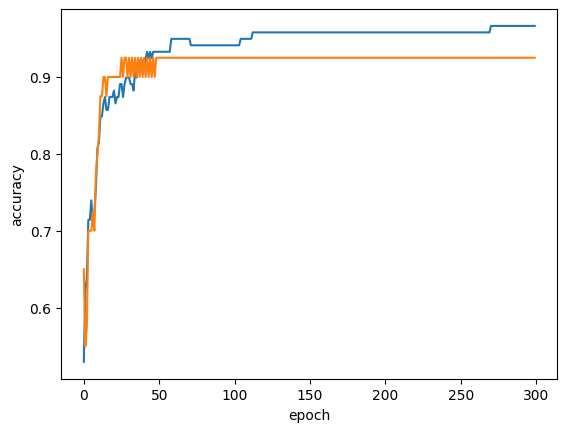

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#100정도 이전은 과소적합으로 둘다 점수가 낮음
#100이후부터는 점수가 조금씩 벌어짐
#100정도의 에포크가 적절한 횟수로 예상됨

In [ ]:
#반복횟수 100에 맞추고 훈련
#tol매개변수 :향상될 최솟값 지정 (None : 자동으로 멈추지 않고 100 반복)
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


* loss매개변수의 기본값 : hinge
* 힌지손실 : 서포트벡터 머신의 손실함수

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


< 함수리마인드 ><br>
사이킷런
  - SGDClassifier : 확률적 경사하강법을 사용한 분류모델
    - loss매개변수 : 확률적 경사하강법으로 최적화 갈 손실함수 지정
    - 기본값 : hinge손실함수
    - 로지스틱회귀 : log_loss
    - panalty 매개변수 : L1, L2(기본값)
      - 규제강도 : alpha매개변수 (기본값 : 0.0001)
    - max_iter : 에포크 횟수지정 (기본값 : 1000)
    - tol : 반복을 멈출 조건
      - n_iter_no_change : 지정한 에포크 동안 손실이 tol만큼 줄지 않으면 알고리즘 중단됨
      (tol 기본값 : 0.0001 / n_iter_no_charge 기본값 : 5)
  
  - SGDRegression : 확률적 경사 하강법을 사용한 회귀모델
    - loss 매개변수에서 손실함수 지정 ( 기본값 : squared_loss _ 제곱오차 )